In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [331]:
df = pd.read_csv("D:\\Bachelors\\Semester 5\\Machine learning\\Datasets\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [332]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [333]:
df.drop(0,inplace=True)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [334]:
df.shape

(1469, 35)

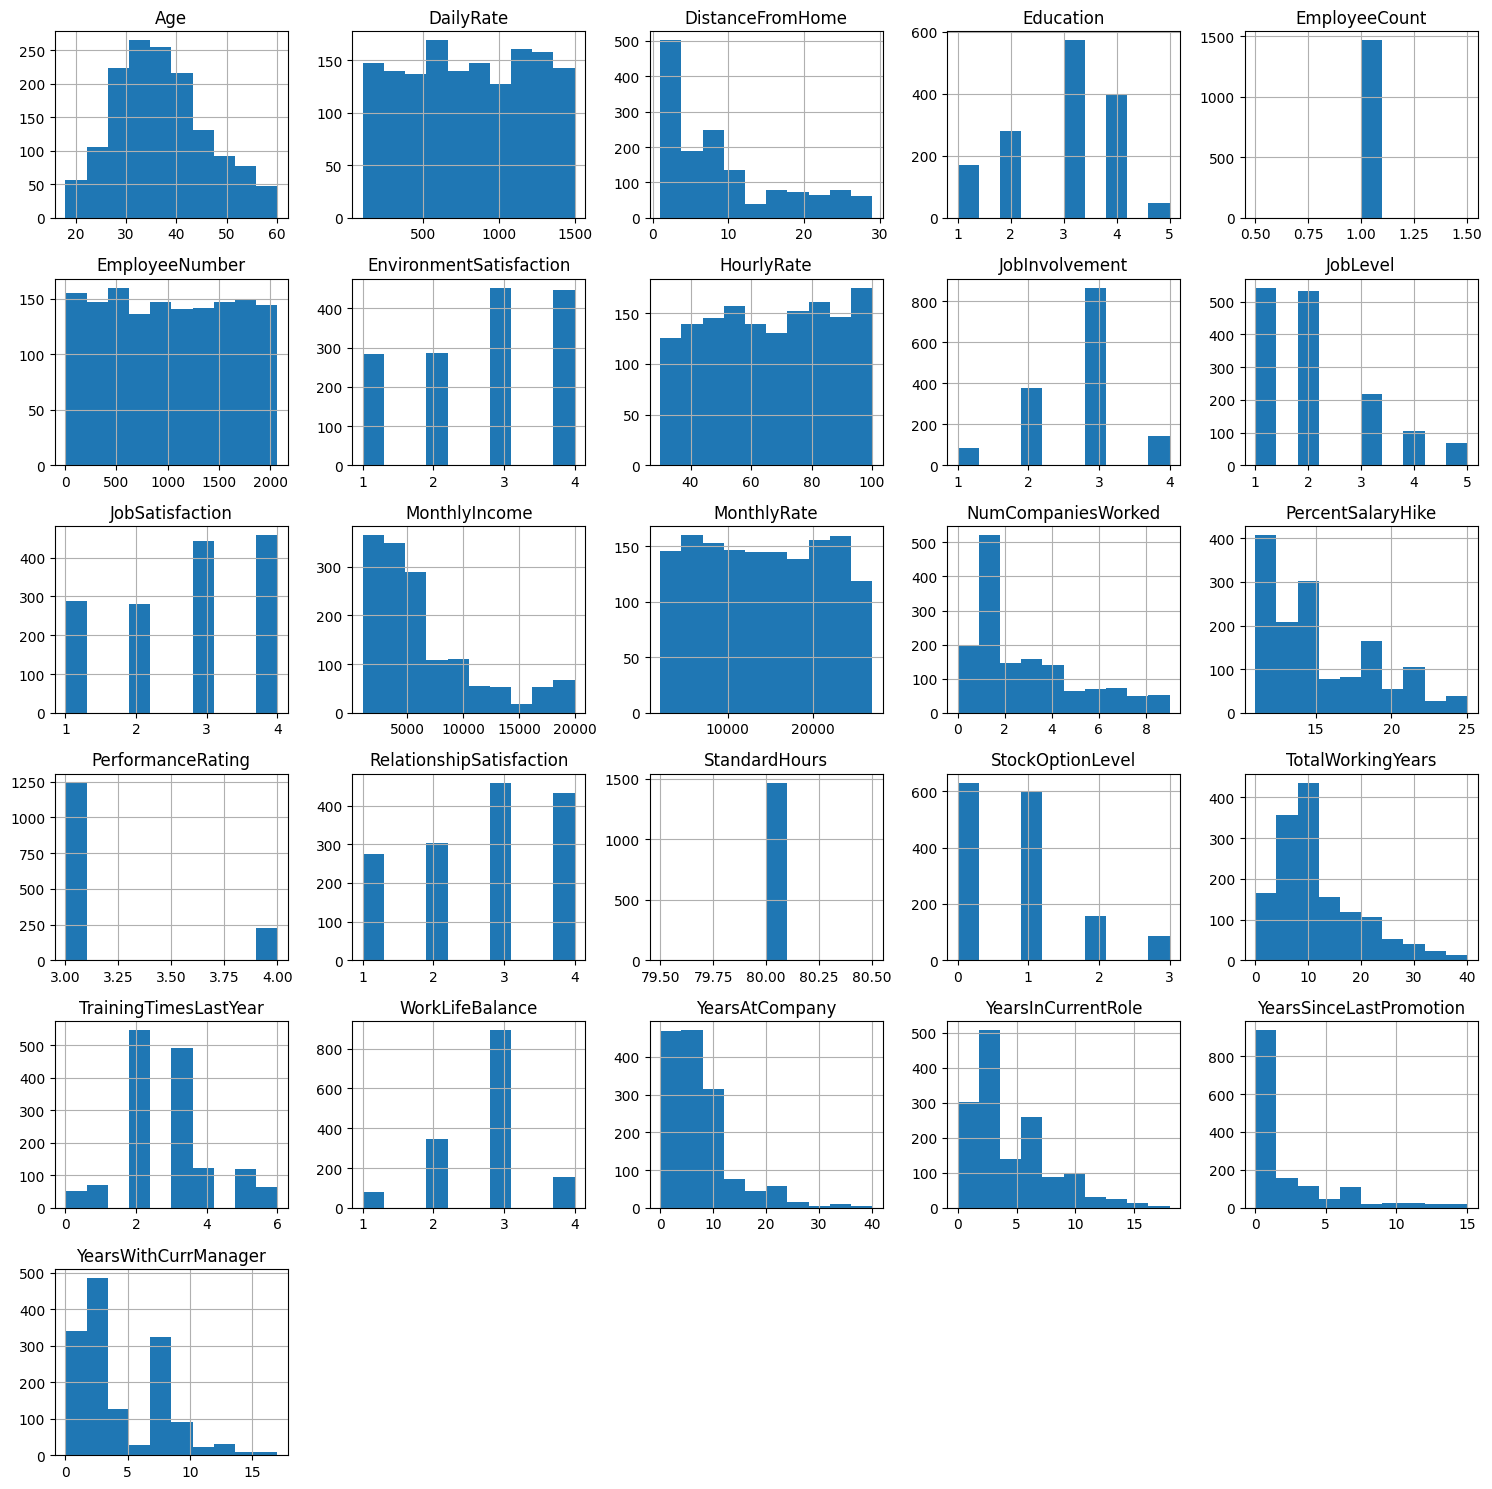

In [335]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

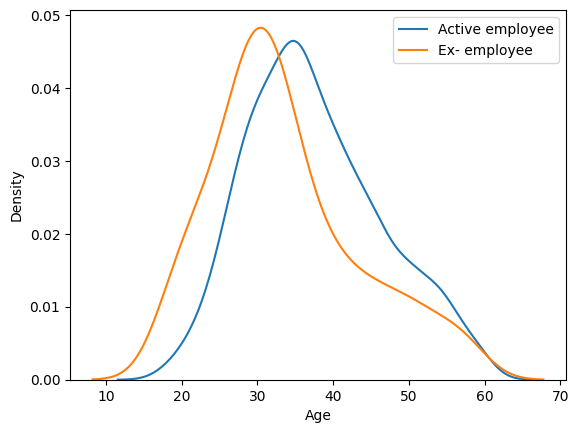

In [336]:
sns.kdeplot(df.loc[df['Attrition'] =='No','Age'],label='Active employee')
sns.kdeplot (df.loc[df['Attrition'] =='Yes','Age'],label='Ex- employee')
plt.legend() 
plt.show() 

In [337]:
df["Gender"].value_counts()

Gender
Male      882
Female    587
Name: count, dtype: int64

In [338]:
# count the gender 
df["Gender"].value_counts()

Gender
Male      882
Female    587
Name: count, dtype: int64

<Axes: title={'center': 'Count of  gender'}, xlabel='Gender'>

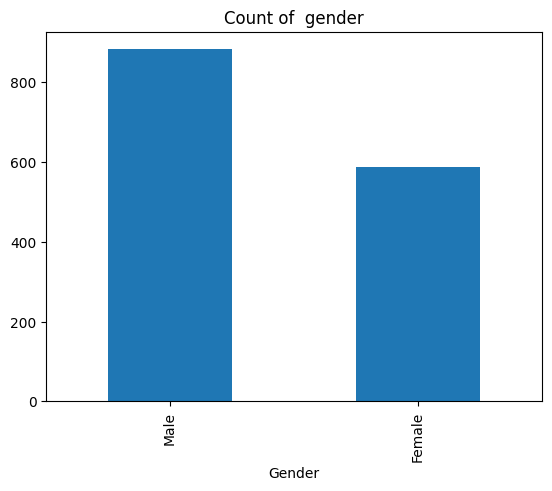

In [339]:
df['Gender'].value_counts().plot(kind='bar',title="Count of  gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

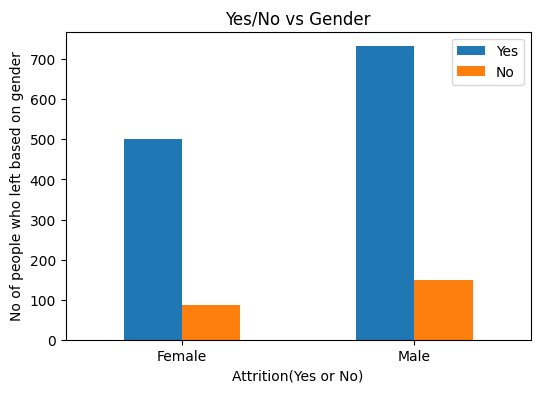

In [340]:
#Employeee attrition (stay or leaving) in comapny based on the their genders 
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(6,4))
plt.title("Yes/No vs Gender")
plt.xlabel("Attrition(Yes or No)")
plt.ylabel("No of people who left based on gender")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [341]:
#promotions count  
promoted_dict = df["YearsSinceLastPromotion"].value_counts()
promoted_dict

YearsSinceLastPromotion
0     580
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

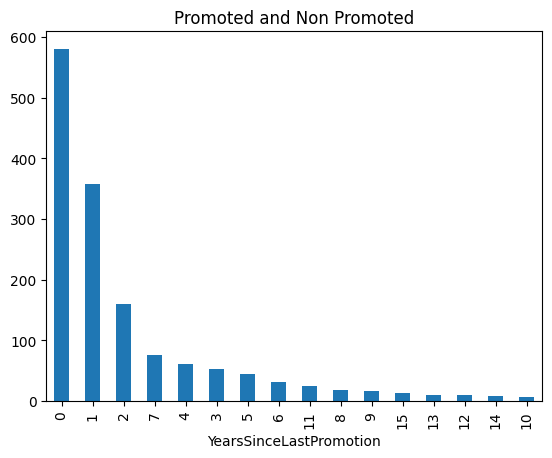

In [342]:
df['YearsSinceLastPromotion'].value_counts().plot(kind='bar',title="Promoted and Non Promoted")
plt.show()

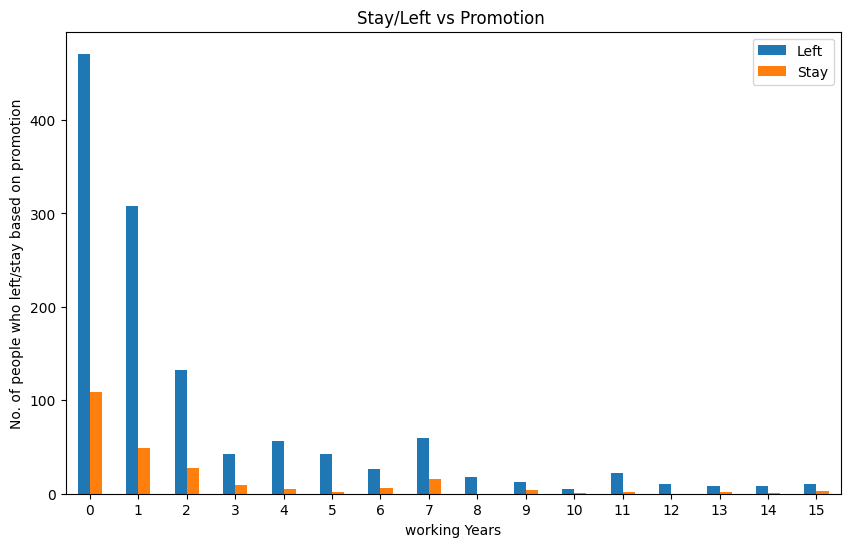

In [343]:
#Employee Attrition based on their promotions 
pd.crosstab(df['YearsSinceLastPromotion'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promotion ")
plt.xlabel("working Years")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()


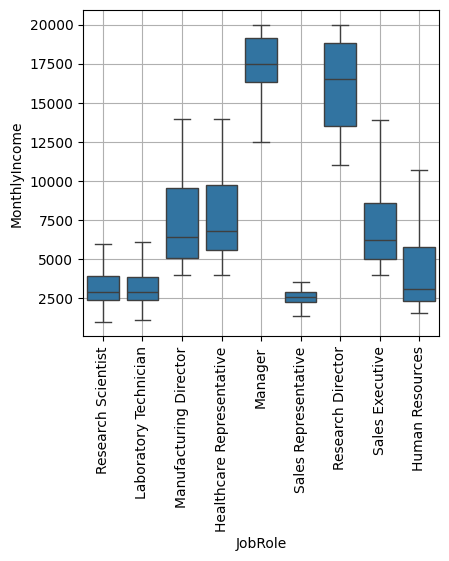

In [344]:
plt.figure(figsize=(5, 4))
sns.boxplot(y=df["MonthlyIncome"], x=df["JobRole"],showfliers=False)
plt.grid(True, alpha=1)
plt.tight_layout()
plt.xticks(rotation='vertical')


plt.show()

<Figure size 600x400 with 0 Axes>

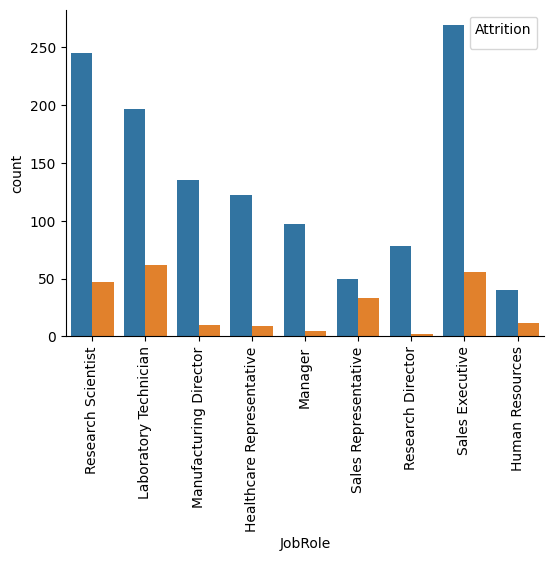

In [345]:
plt.figure(figsize=(6, 4))  # Set the figure size to 6 inches wide and 4 inches tall
sns.catplot(x='JobRole', hue='Attrition', data=df, kind="count", height=4, aspect=1.5, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [346]:
#marriage status count
Marrige_dict = df["MaritalStatus"].value_counts()
Marrige_dict

MaritalStatus
Married     673
Single      469
Divorced    327
Name: count, dtype: int64

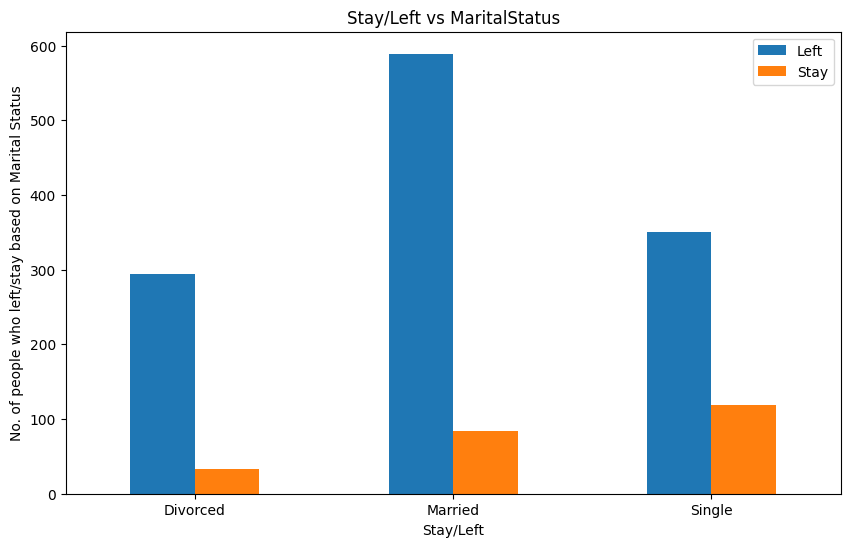

In [347]:
# #Employee Attrition based on their Marial Status
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on Marital Status")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()

In [348]:
# data conversion 
df['Attrition']=df['Attrition'].apply(lambda x : 1 if x =='Yes' else 0)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [349]:
# Now  convert Categorical values to Numerical values
df=pd.get_dummies(df)
df


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1,49,0,279,8,1,1,2,3,61,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1,1373,2,2,1,4,4,92,2,...,False,False,False,False,False,False,True,True,False,True
3,33,0,1392,3,4,1,5,4,56,3,...,False,True,False,False,False,True,False,True,False,True
4,27,0,591,2,1,1,7,1,40,3,...,False,False,False,False,False,True,False,True,True,False
5,32,0,1005,2,2,1,8,4,79,3,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,False,False,False,False,False,True,False,True,True,False
1466,39,0,613,6,1,1,2062,4,42,2,...,False,False,False,False,False,True,False,True,True,False
1467,27,0,155,4,3,1,2064,2,87,4,...,False,False,False,False,False,True,False,True,False,True
1468,49,0,1023,2,3,1,2065,4,63,2,...,False,False,True,False,False,True,False,True,True,False


In [350]:
#Separating Feature and Target matrices
X = df.drop(['Attrition'], axis=1)
y=df['Attrition']

In [351]:
# Scaling the data values to standardize the range of independent variables means normalizing it because  in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [352]:
#  Now we Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [353]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Here we Train the Model
    y_pred = model.predict(X_test) #Now we Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    

In [354]:
#Function to plot Confusion Matrix after calculation of each model 
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

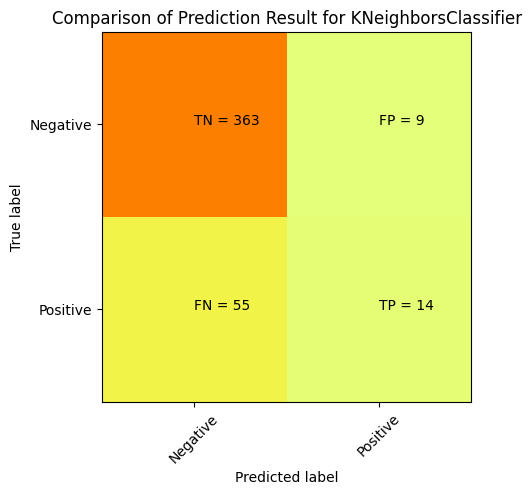

Accuracy of the Model KNeighborsClassifier 85.5%


In [355]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

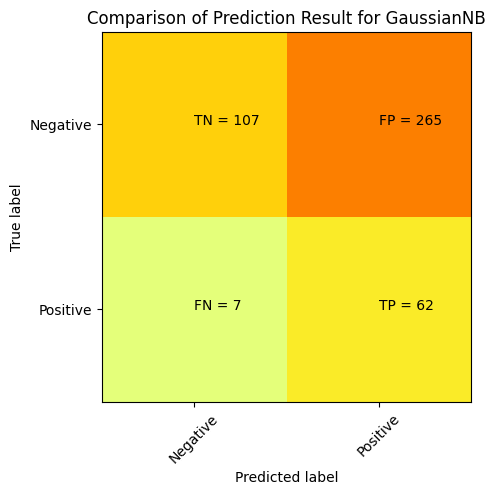

Accuracy of the Model GaussianNB 38.3%


In [356]:
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

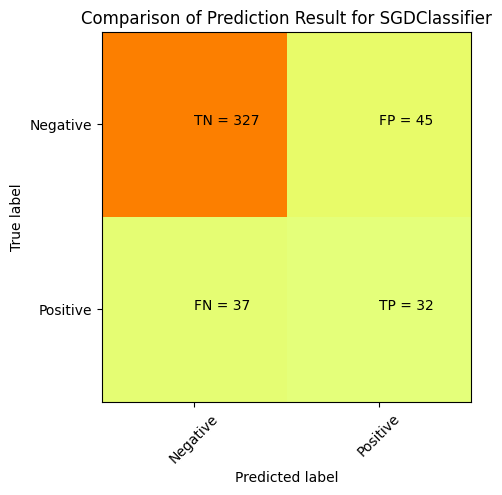

Accuracy of the Model SGDClassifier 81.4%


In [357]:
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

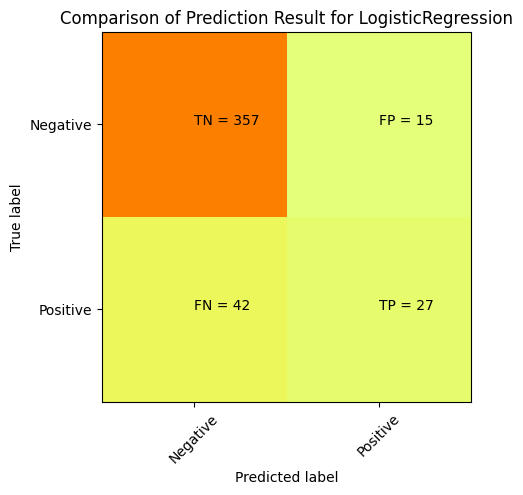

Accuracy of the Model LogisticRegression 87.1%


In [358]:
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

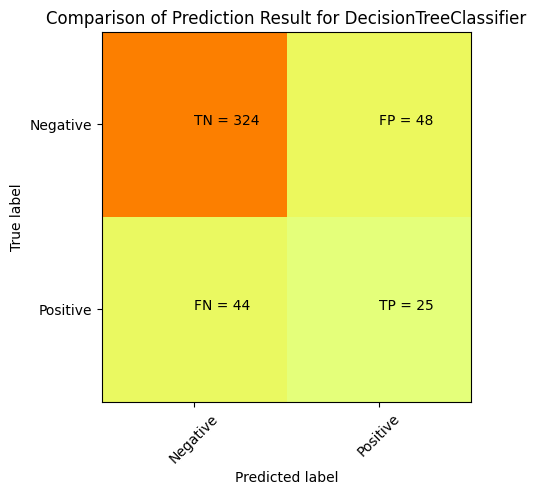

Accuracy of the Model DecisionTreeClassifier 79.1%


In [359]:
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

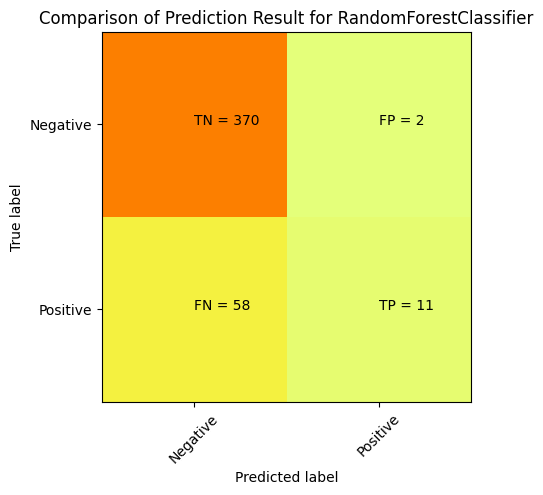

Accuracy of the Model RandomForestClassifier 86.4%


In [360]:
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

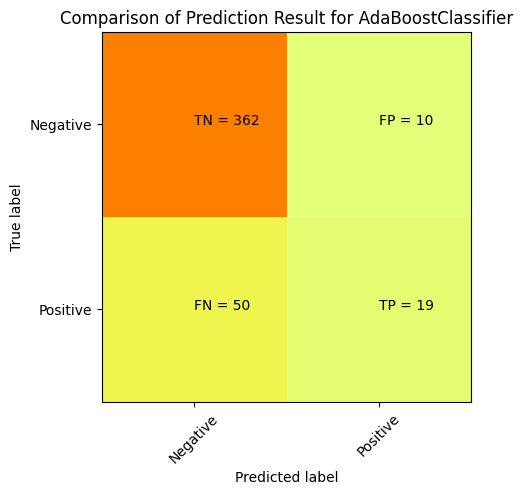

Accuracy of the Model AdaBoostClassifier 86.4%


In [361]:
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

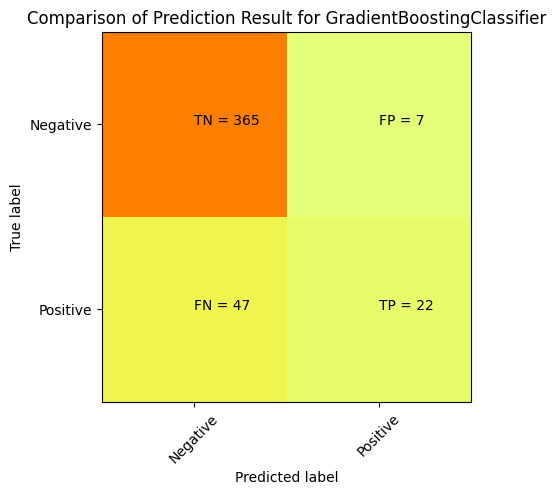

Accuracy of the Model GradientBoostingClassifier 87.8%


In [362]:
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

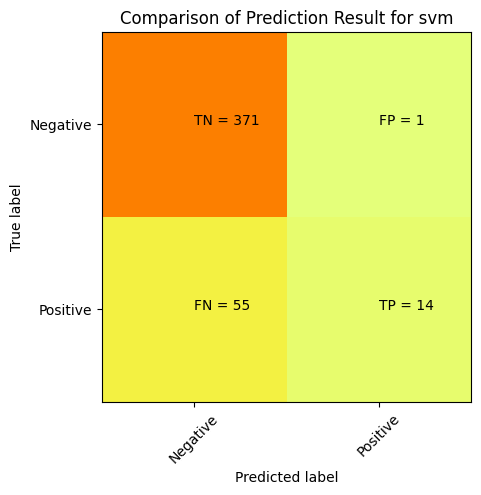

Accuracy of the Model svm 87.3%


In [363]:
Model = "svm"
model=SVC()

train_test_ml_model(X_train,y_train,X_test,Model)

In [364]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
SGD= SGDClassifier()
Ada= AdaBoostClassifier()
GD= GradientBoostingClassifier()


In [365]:
def train_test_ml_model(X_train, y_train, X_test, model, model_name):
    model.fit(X_train, y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_prediction)
    test_accuracy = accuracy_score(y_test, test_prediction)
    
    msg1 = f"[{model_name}] training data accuracy is: {train_accuracy}"
    msg2 = f"[{model_name}] test data accuracy is: {test_accuracy}"
    print(msg1)
    print(msg2)
  

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), RandomForestClassifier(), GaussianNB(),SGDClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
model_names = ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest", "Naive Bayes","SGD","Ada","GD"]

for model, name in zip(models, model_names):
    train_test_ml_model(X_train, y_train, X_test, model, name)
    print()


[Logistic Regression] training data accuracy is: 0.9046692607003891
[Logistic Regression] test data accuracy is: 0.8707482993197279

[Decision Tree] training data accuracy is: 1.0
[Decision Tree] test data accuracy is: 0.7777777777777778

[KNN] training data accuracy is: 0.8842412451361867
[KNN] test data accuracy is: 0.854875283446712

[SVM] training data accuracy is: 0.919260700389105
[SVM] test data accuracy is: 0.873015873015873

[Random Forest] training data accuracy is: 1.0
[Random Forest] test data accuracy is: 0.8571428571428571

[Naive Bayes] training data accuracy is: 0.4163424124513619
[Naive Bayes] test data accuracy is: 0.3832199546485261

[SGD] training data accuracy is: 0.8638132295719845
[SGD] test data accuracy is: 0.7981859410430839

[Ada] training data accuracy is: 0.8910505836575876
[Ada] test data accuracy is: 0.8639455782312925

[GD] training data accuracy is: 0.9649805447470817
[GD] test data accuracy is: 0.8775510204081632



In [366]:
model_scores = {
    'Logistic Regression': models[0].score(X_test, y_test),
    'Decision Tree': models[1].score(X_test, y_test),
    'KNN Classifier': models[2].score(X_test, y_test),
    'SVM': models[3].score(X_test, y_test),
    'Random Forest': models[4].score(X_test, y_test),
    'Naive Bayes': models[5].score(X_test, y_test),
    'SGD': models[6].score(X_test, y_test),
    'AdaBoost': models[7].score(X_test, y_test),
    'GradientBoosting': models[8].score(X_test, y_test)
}

for model, score in model_scores.items():
    print(f"{model} score: {score}")


Logistic Regression score: 0.8707482993197279
Decision Tree score: 0.7777777777777778
KNN Classifier score: 0.854875283446712
SVM score: 0.873015873015873
Random Forest score: 0.8571428571428571
Naive Bayes score: 0.3832199546485261
SGD score: 0.7981859410430839
AdaBoost score: 0.8639455782312925
GradientBoosting score: 0.8775510204081632


In [367]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
print(model_compare)


          Logistic Regression  Decision Tree  KNN Classifier       SVM  \
accuracy             0.870748       0.777778        0.854875  0.873016   

          Random Forest  Naive Bayes       SGD  AdaBoost  GradientBoosting  
accuracy       0.857143      0.38322  0.798186  0.863946          0.877551  


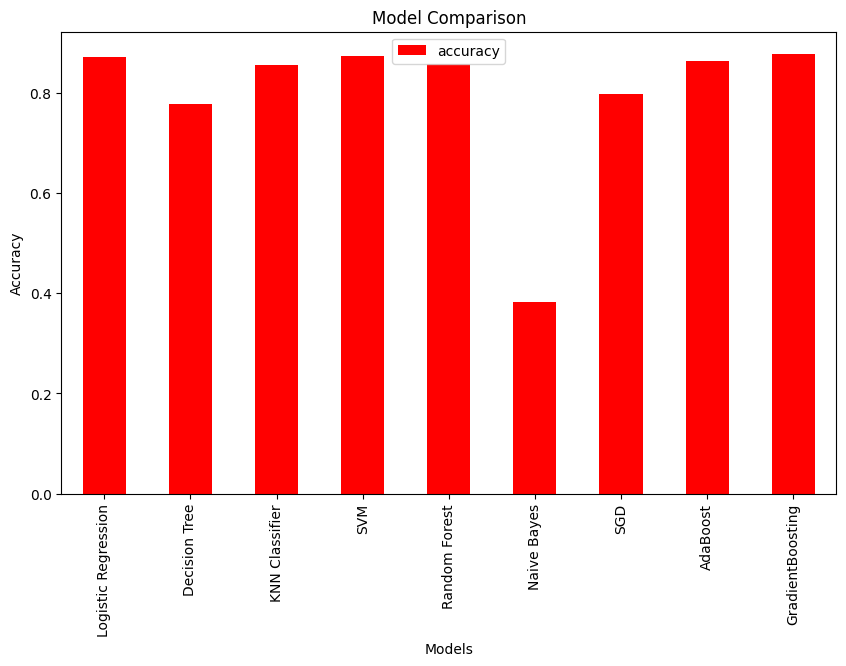

In [368]:


model_compare.T.plot(kind='bar',color=['red'],figsize=(10,6))


# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Display the plot
plt.show()
